## What does the most "normal" rescue dog look like?

During the beginning of COVID-19, many locked-down milennials and gen-z-ers found their homes getting 4 feet (erm, paws) bigger. While the homes welcomed all shapes and sizes of new furry friends, what does the most normal rescue dog look like?

We'll start by importing a scraped list of dogs on the popular [petfinder.com](petfinder.com), a top site for animals in need of a home. 

In [1]:
import pandas as pd
import seaborn as sns
import re
from string import punctuation
import markovify

In [2]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-12-17/dog_descriptions.csv"
data = pd.read_csv(url)

Let's check out the data first.

In [3]:
data.columns

Index(['id', 'org_id', 'url', 'species', 'breed_primary', 'breed_secondary',
       'breed_mixed', 'breed_unknown', 'color_primary', 'color_secondary',
       'color_tertiary', 'age', 'sex', 'size', 'coat', 'fixed',
       'house_trained', 'declawed', 'special_needs', 'shots_current',
       'env_children', 'env_dogs', 'env_cats', 'name', 'tags', 'photo',
       'status', 'posted', 'contact_city', 'contact_state', 'contact_zip',
       'contact_country', 'stateQ', 'accessed', 'type', 'description'],
      dtype='object')

From this list, let's look at `breed_primary`, `age`, `sex`, `size`, and `description`. 

In [4]:
breed_desc = data[["breed_primary","age", "sex", "size", "description"]].dropna()

<AxesSubplot:>

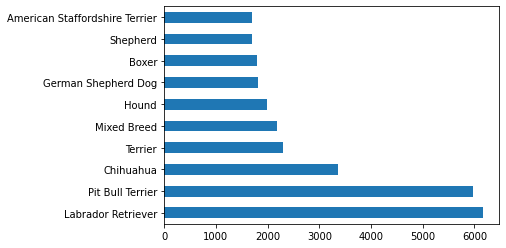

In [5]:
breed_desc["breed_primary"].value_counts().head(10).plot(kind='barh')

<AxesSubplot:>

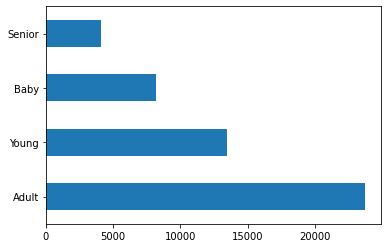

In [6]:
breed_desc["age"].value_counts().plot(kind='barh')

<AxesSubplot:>

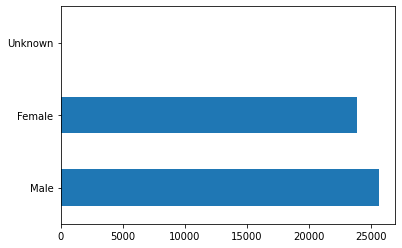

In [7]:
breed_desc["sex"].value_counts().plot(kind='barh')

<AxesSubplot:>

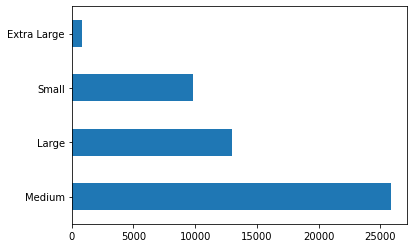

In [8]:
breed_desc["size"].value_counts().plot(kind='barh')

From just a few lines of code, it looks like our most average dog is a medium, adult aged, male labrador retriever. This gives us good quantitative data of what the dog looks like, but the heart and soul of a rescue dog's personality lives in the description. Let's first check out what kind of keywords are most used to explain the dogs.

## Catfishing dogs
### (or, Markov chains and text wrangling for computer-generated descriptions)

We can use a technique called [Markov chains](https://setosa.io/ev/markov-chains/) and the library [markovify](https://pypi.org/project/markovify/) to use natural language processing techniques for generating fake dog descriptions.

In [9]:
def clean_desc(text):
    text = text.lower()  # Lowercase text
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)  # Remove punctuation
    text = " ".join(text.split())  # Remove extra spaces, tabs, and new lines
    return text

In [10]:
breed_desc["clean_text"] = breed_desc["description"].map(clean_desc)
breed_desc["clean_text"]

0        harley is not sure how he wound up at shelter ...
1        6 year old biggie has lost his home and really...
2        approx 2 years old did i catch your eye i dont...
4        theo is a friendly dachshund mix who gets alon...
5        oliver was born around midjune and came to us ...
                               ...                        
58166    charlie was adopted from us 5 years ago but re...
58167    samson is a dog that will need someone to show...
58172    buddy was an owner surrender by an older gentl...
58175    due to the small size of our volunteer base we...
58177    due to the small size of our volunteer base we...
Name: clean_text, Length: 49475, dtype: object

In [ ]:
text_model = markovify.Text(breed_desc["clean_text"], state_size=4)

for i in range(3):
    print(text_model.make_short_sentence(280) + "\n")

The beautiful thing about data science is that you really have 3 possible outcomes with your EDA.

1. You learn your data is bad, and you can't do what you thought you were going to do.
2. You learn about your data, but it's really just reiterating the things you already know.
3. You learn new and unexpected things about your data.

And they don't happen equally. At first glance, our small markov model sees something unexpected-- the descriptions might be used more often as a contact card than a dog's profile for personality traits. 

Why might it seem this way? Well, we don't know for sure. This might just be the most OFTEN used. #to do, add more